In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold,cross_validate, GroupKFold
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

cols = ['block', 'power', 'wspeed', 'gflow', 'focalpos', 'angularpos', 'strength',
        'wnum', 'wpathpos', 'crack', 'wwidthsteel', 'wwidthcopper', 'wdepthcopper',
        'gap', 'cracknum', 'cracklen']



In [68]:
df = pd.read_csv(
    'D:\Simulations\ML_Predict\steel1.csv',
    sep=";",
    decimal=",",
    encoding="cp1252", header=0)

df.columns=cols
df['crack']=(df['crack']=='yes').astype(int)

df.head()

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\erfan\AppData\Local\Temp\ipykernel_15712\877758872.py:2: SyntaxWarning: invalid escape sequence '\S'
  'D:\Simulations\ML_Predict\steel1.csv',


,block,power,wspeed,gflow,focalpos,angularpos,strength,wnum,wpathpos,crack,wwidthsteel,wwidthcopper,wdepthcopper,gap,cracknum,cracklen
0,1,1050,1.0,15,0,0,0.6,1,8,0,2097.0,286.0,110.0,58.0,NaN,NaN
1,1,1050,1.0,15,0,0,0.6,1,16,0,2069.0,384.0,149.0,85.0,NaN,NaN
2,1,1050,1.0,15,0,0,0.6,1,24,0,2043.0,385.0,177.0,91.0,NaN,NaN
3,1,1050,1.0,15,0,0,0.6,1,32,0,2010.0,414.0,164.0,58.0,NaN,NaN
4,1,1050,1.0,15,0,0,0.6,2,8,0,2232.0,320.0,149.0,102.0,NaN,NaN


In [69]:
df['crack'].value_counts()

crack
0    309
1     51
Name: count, dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   block         360 non-null    int64  
 1   power         360 non-null    int64  
 2   wspeed        360 non-null    float64
 3   gflow         360 non-null    int64  
 4   focalpos      360 non-null    int64  
 5   angularpos    360 non-null    int64  
 6   strength      360 non-null    float64
 7   wnum          360 non-null    int64  
 8   wpathpos      360 non-null    int64  
 9   crack         360 non-null    int32  
 10  wwidthsteel   300 non-null    float64
 11  wwidthcopper  300 non-null    float64
 12  wdepthcopper  300 non-null    float64
 13  gap           300 non-null    float64
 14  cracknum      51 non-null     float64
 15  cracklen      51 non-null     float64
dtypes: float64(8), int32(1), int64(7)
memory usage: 43.7 KB


In [71]:
df.describe()

,block,power,wspeed,gflow,focalpos,angularpos,strength,wnum,wpathpos,crack,wwidthsteel,wwidthcopper,wdepthcopper,gap,cracknum,cracklen
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.00000,360.000000,300.000000,300.000000,300.000000,300.00000,51.000000,51.000000
mean,1.500000,1050.000000,1.000000,15.000000,0.000000,0.000000,0.600000,3.000000,20.00000,0.141667,2074.076667,258.603333,134.120000,78.20000,4.333333,359.715098
std,0.500696,132.471682,0.176629,4.415723,1.766289,13.247168,0.088314,1.416182,8.95672,0.349193,364.899644,182.594767,173.243789,57.45692,2.055886,118.567927
min,1.000000,900.000000,0.800000,10.000000,-2.000000,-15.000000,0.500000,1.000000,8.00000,0.000000,0.000000,0.000000,0.000000,10.00000,1.000000,146.790000
25%,1.000000,900.000000,0.800000,10.000000,-2.000000,-15.000000,0.500000,2.000000,14.00000,0.000000,1868.500000,95.500000,9.000000,35.00000,3.000000,264.020000
50%,1.500000,1050.000000,1.000000,15.000000,0.000000,0.000000,0.600000,3.000000,20.00000,0.000000,2016.500000,258.500000,58.500000,64.00000,4.000000,334.600000
75%,2.000000,1200.000000,1.200000,20.000000,2.000000,15.000000,0.700000,4.000000,26.00000,0.000000,2255.500000,394.000000,163.250000,102.00000,6.000000,457.705000
max,2.000000,1200.000000,1.200000,20.000000,2.000000,15.000000,0.700000,5.000000,32.00000,1.000000,3637.000000,629.000000,705.000000,502.00000,10.000000,647.630000


In [75]:
## For classification problem (cracked vs non-cracked) we need only crack column 
df = df.drop(columns=['cracknum', 'cracklen'], errors='ignore')
df.head()

,block,power,wspeed,gflow,focalpos,angularpos,strength,wnum,wpathpos,crack,wwidthsteel,wwidthcopper,wdepthcopper,gap
0,1,1050,1.0,15,0,0,0.6,1,8,0,2097.0,286.0,110.0,58.0
1,1,1050,1.0,15,0,0,0.6,1,16,0,2069.0,384.0,149.0,85.0
2,1,1050,1.0,15,0,0,0.6,1,24,0,2043.0,385.0,177.0,91.0
3,1,1050,1.0,15,0,0,0.6,1,32,0,2010.0,414.0,164.0,58.0
4,1,1050,1.0,15,0,0,0.6,2,8,0,2232.0,320.0,149.0,102.0


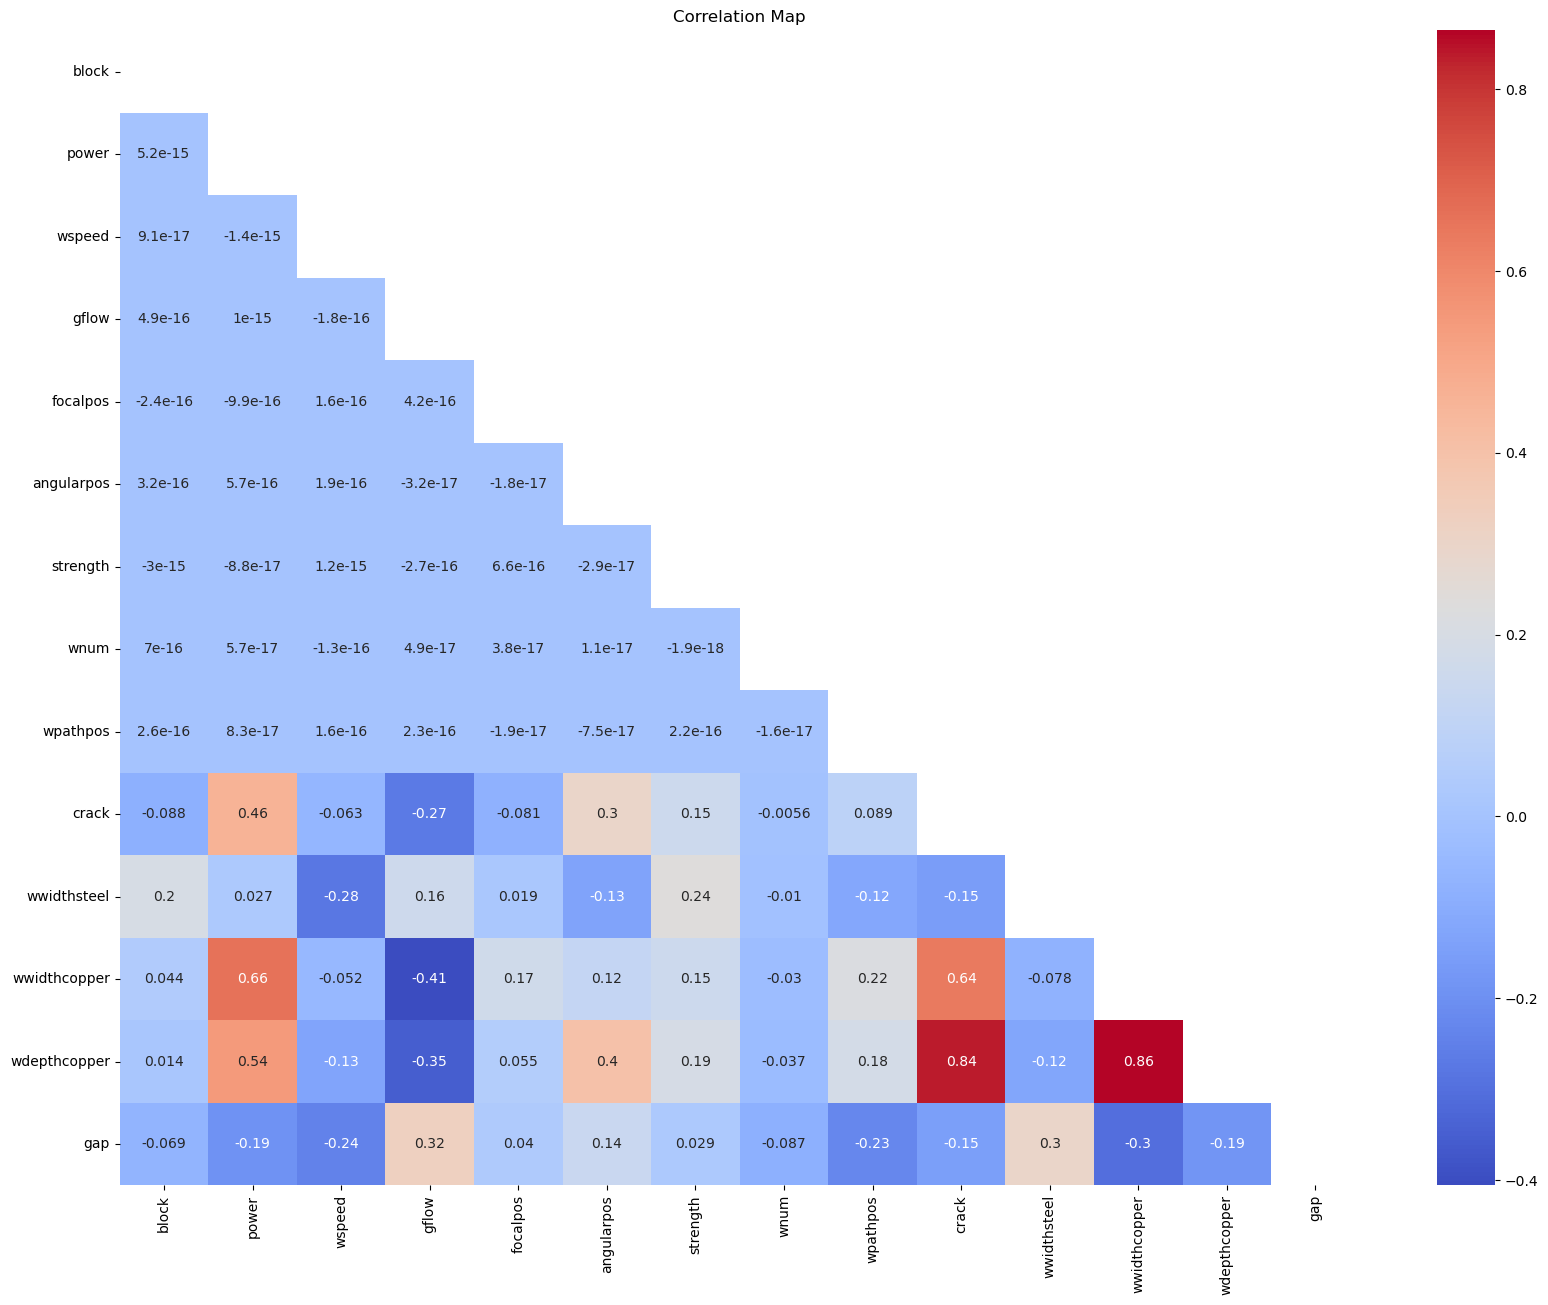

In [65]:
plt.figure(figsize=(20, 15))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.title("Correlation Map")
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')
plt.show()


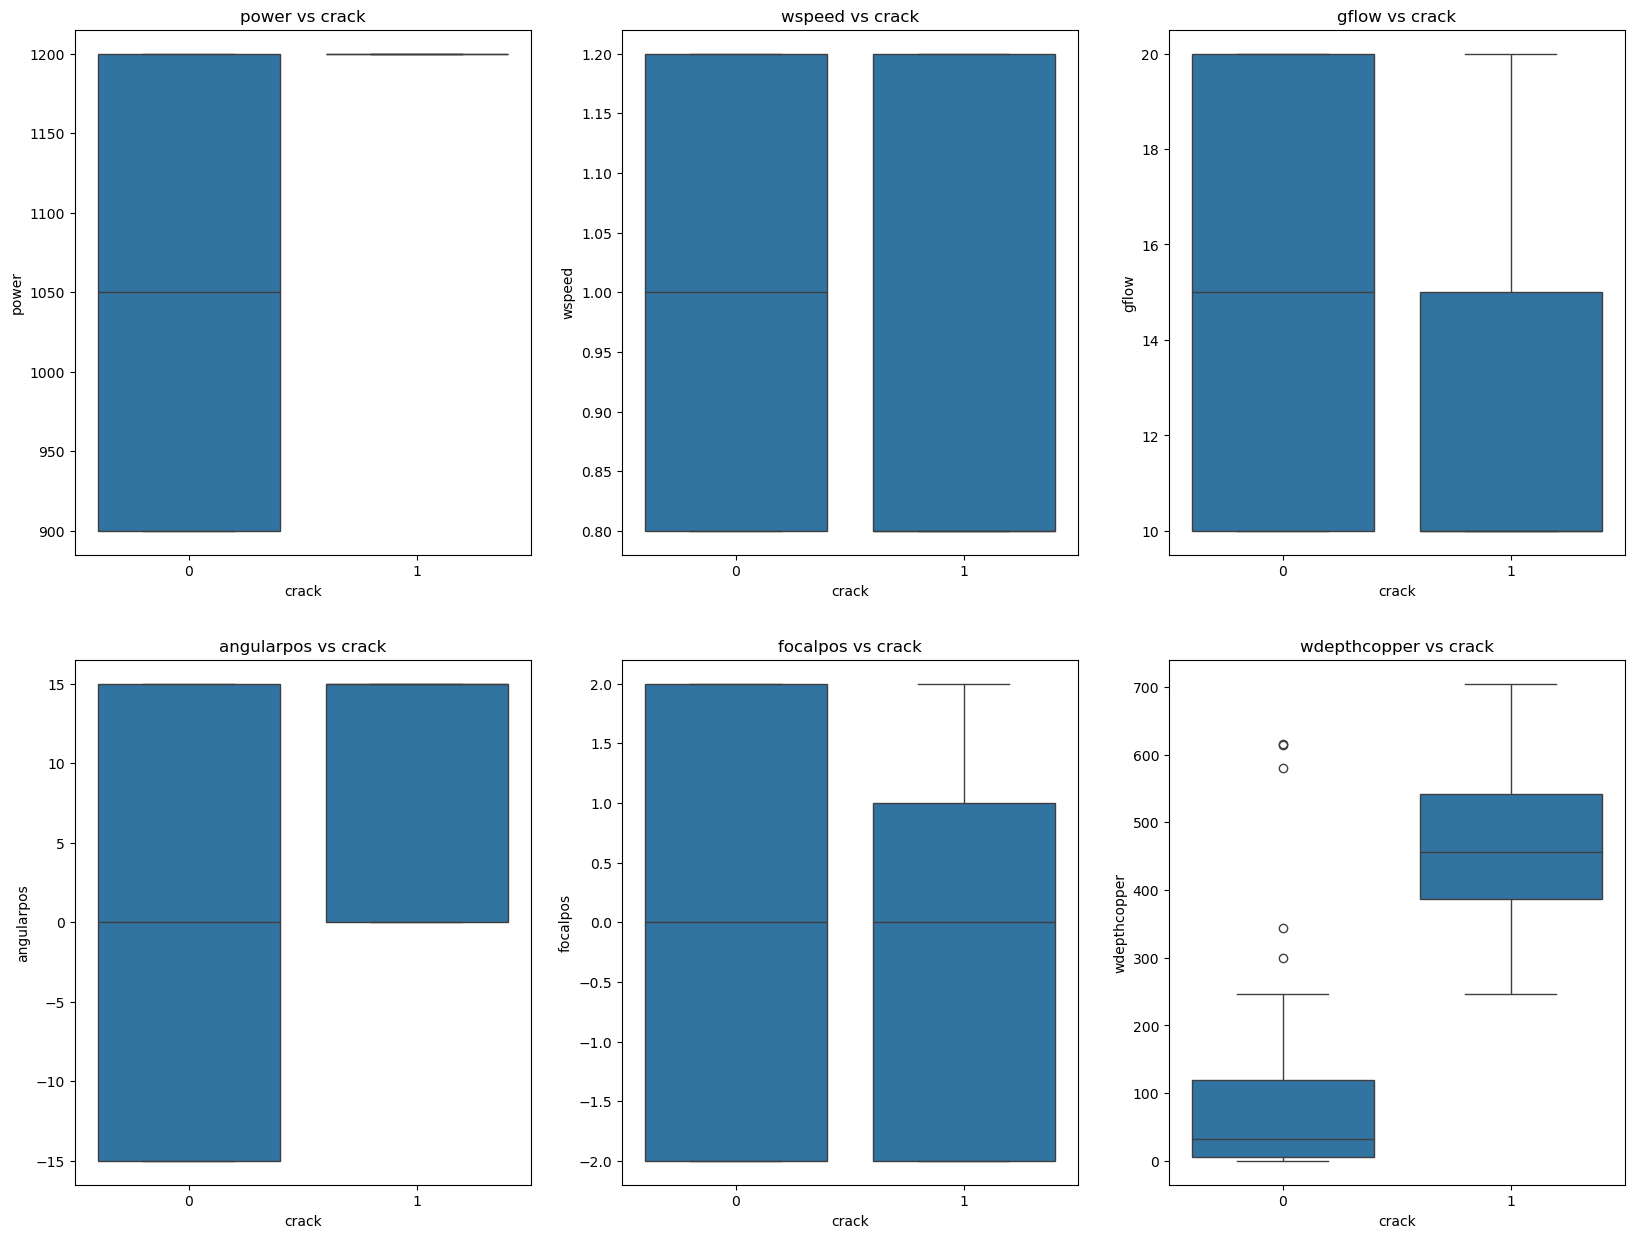

In [67]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
params = ['power', 'wspeed', 'gflow', 'angularpos', 'focalpos', 'wdepthcopper']
for ax, p in zip(axes.flatten(), params):
  sns.boxplot(df, x='crack', y=p, ax=ax)
  ax.set_title(f"{p} vs crack")
plt.tight_layout
plt.show()

C:\Users\erfan\AppData\Local\Temp\ipykernel_15712\4058774532.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='crack', y=p, inner='box', palette='Set2', ax=ax)
C:\Users\erfan\AppData\Local\Temp\ipykernel_15712\4058774532.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='crack', y=p, inner='box', palette='Set2', ax=ax)
C:\Users\erfan\AppData\Local\Temp\ipykernel_15712\4058774532.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='crack', y=p, inner='box', palette='Set2', ax=ax)
C:\Users\erfa

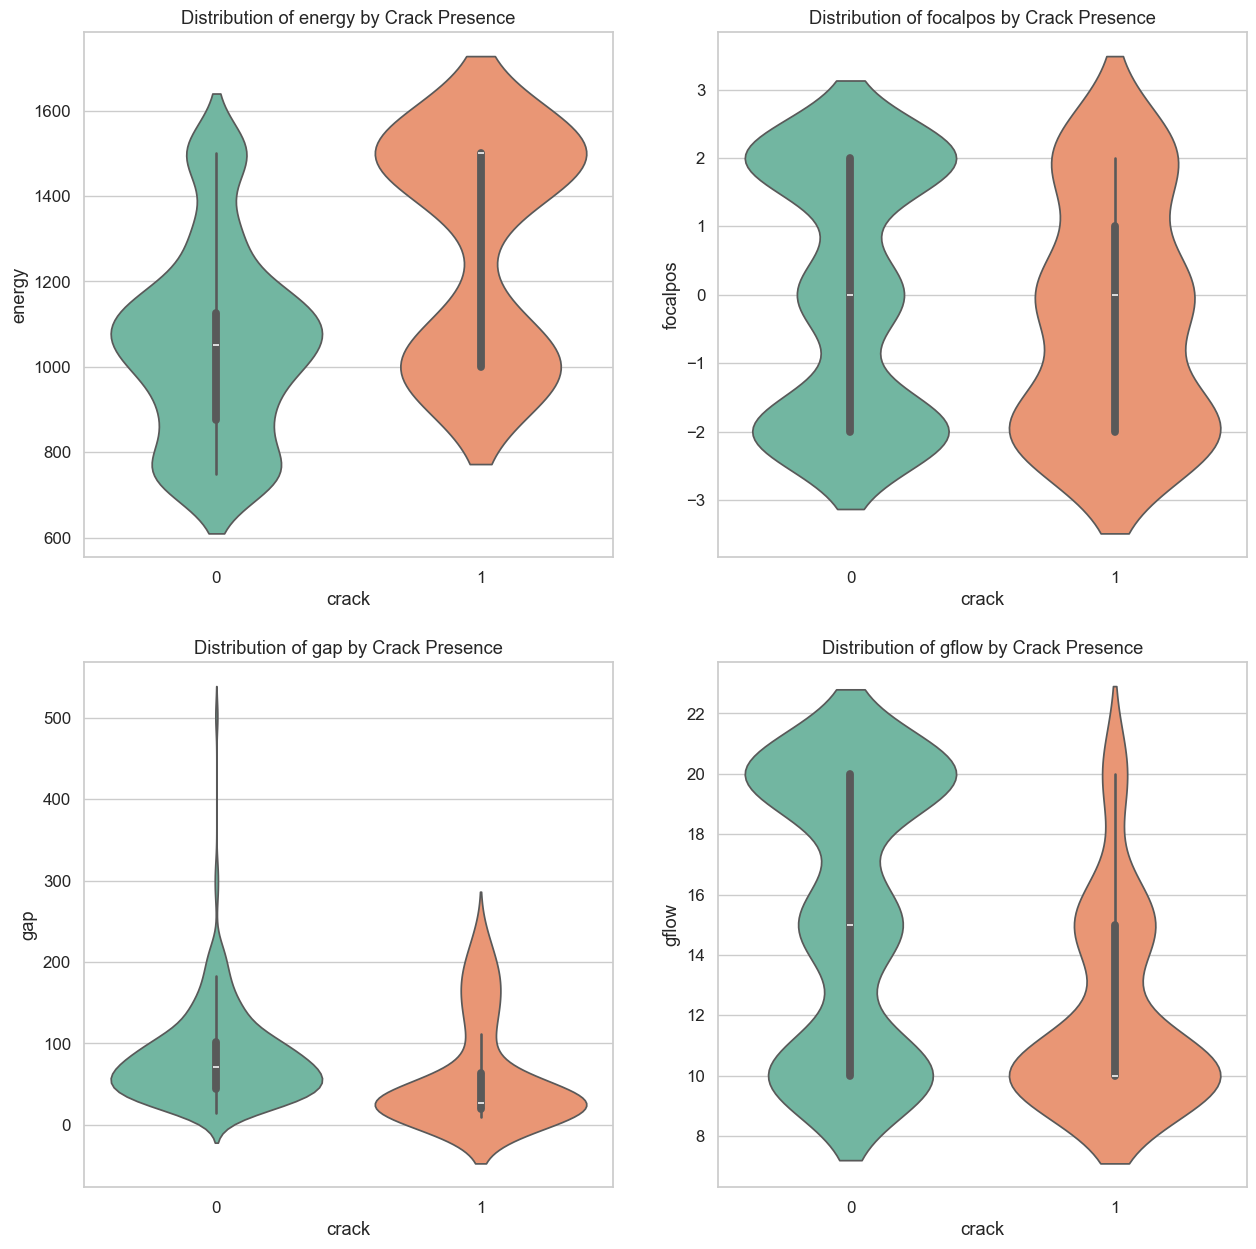

In [76]:
##. Feature Engineering

df['energy'] = df['power']/df['wspeed'] # Laser power
df['aspect_ratio_cu'] = df['wwidthcopper'] / (df['wdepthcopper'] + 1e-6)

features = ['power', 'wspeed', 'gflow', 'focalpos', 'angularpos',
            'wdepthcopper', 'wwidthcopper', 'gap', 'energy',
            'aspect_ratio_cu']


sns.set(style="whitegrid", font_scale=1.1)

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()
# Violin plots for selected features
params2 = ['energy', 'focalpos', 'gap', 'gflow']
for ax, p in zip(axes, params2):
    sns.violinplot(data=df, x='crack', y=p, inner='box', palette='Set2', ax=ax)
    ax.set_title(f'Distribution of {p} by Crack Presence')
    ax.set_ylabel(p)
plt.show()

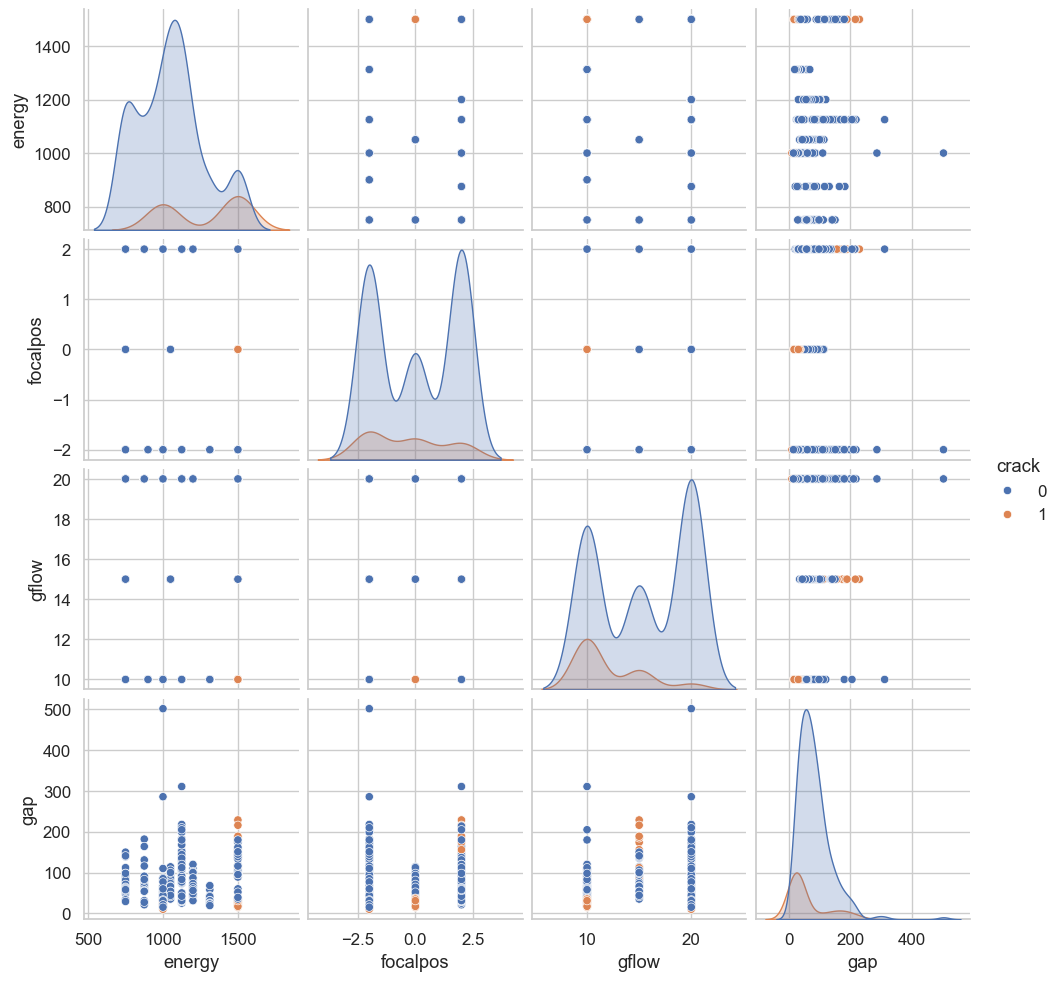

In [77]:
sns.pairplot(df, hue='crack', vars=['energy','focalpos','gflow','gap'])


                 Model  roc_auc_mean   f1_mean  accuracy_mean  \
0  Logistic Regression      0.826893  0.226950       0.869444   
1        Random Forest      0.892474  0.303030       0.902778   
2    Gradient Boosting      0.914984  0.585859       0.938889   

   average_precision_mean  roc_auc_std    f1_std  accuracy_std  \
0                0.597937     0.209288  0.320956      0.014164   
1                0.660191     0.100410  0.428550      0.048273   
2                0.674802     0.047864  0.415003      0.033564   

   average_precision_std  
0               0.361361  
1               0.283209  
2               0.242886  


C:\Users\erfan\AppData\Local\Temp\ipykernel_15712\2018906279.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='roc_auc_mean', y='Model', ax=axes[0], palette='viridis', orient='h', errorbar=None)
C:\Users\erfan\AppData\Local\Temp\ipykernel_15712\2018906279.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='f1_mean', y='Model', ax=axes[1], palette='magma', orient='h', errorbar=None)


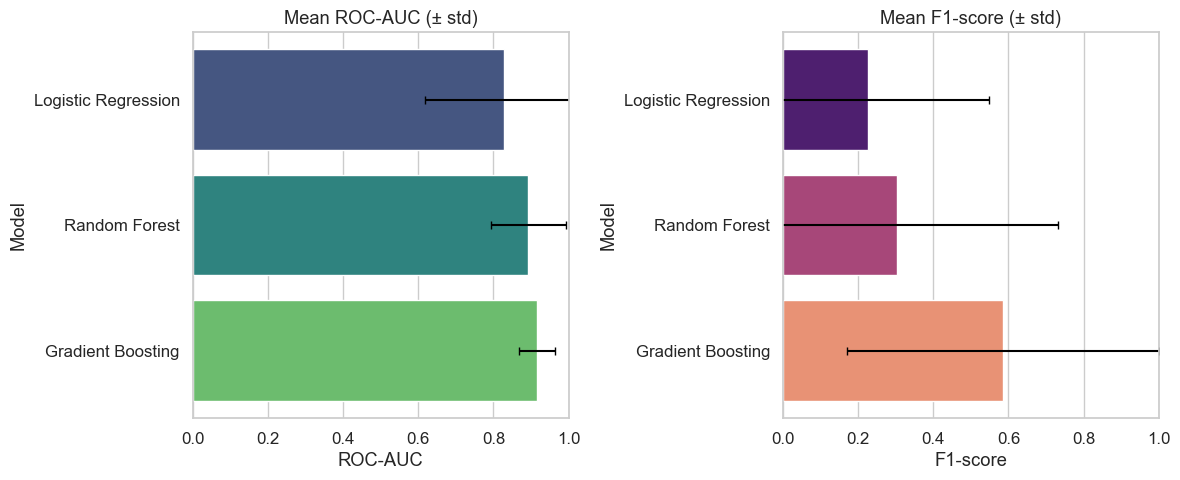

In [80]:
## Predict cracking (Classification Problem)

combo_cols = ["block","power","wspeed","gflow","focalpos","angularpos","strength"]
df["combo_id"] = df.groupby(combo_cols, dropna=False).ngroup()

X_geom = df[["power","wspeed","gflow","focalpos","angularpos","strength",
             "gap","energy","aspect_ratio_cu"]].copy()
y = df["crack"].astype(int)
groups = df["combo_id"]

numeric_features = X_geom.columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])


models = {
    'Logistic Regression': LogisticRegression(C=1.0,
                                              max_iter=1000,
                                              random_state=42,
                                              class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=50,
                                            max_depth=5,
                                           random_state=42,
                                 class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50,
                                                    learning_rate=0.1,
                                                    max_depth=3,
                                                    random_state=42)}

# ================================================================
# 5. Evaluation loop
# ================================================================
results = []
cv = GroupKFold(n_splits=3)

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("smote", SMOTE(sampling_strategy=0.5, random_state=42)),
        ("model", model)
    ])
    scores = cross_validate(pipe, X_geom, y,
                            scoring=["roc_auc","f1","accuracy","average_precision"],
                            cv=cv, groups=groups, n_jobs=-1, return_train_score=False)

    metrics_mean = {k.replace("test_", "")+"_mean": np.mean(v) for k,v in scores.items() if k.startswith("test_")}
    metrics_std  = {k.replace("test_", "")+"_std":  np.std(v) for k,v in scores.items() if k.startswith("test_")}
    results.append({'Model': name, **metrics_mean, **metrics_std})

results_df = pd.DataFrame(results)
print(results_df)

# ================================================================
# Plot comparison (AUC and F1)
# ================================================================
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ROC-AUC with std bars
sns.barplot(data=results_df, x='roc_auc_mean', y='Model', ax=axes[0], palette='viridis', orient='h', errorbar=None)
axes[0].errorbar(results_df['roc_auc_mean'], np.arange(len(results_df)),
                 xerr=results_df['roc_auc_std'], fmt='none', ecolor='black', capsize=3)
axes[0].set_title("Mean ROC-AUC (± std)")
axes[0].set_xlabel("ROC-AUC")
axes[0].set_xlim(0.0, 1.0)

# F1 with std bars
sns.barplot(data=results_df, x='f1_mean', y='Model', ax=axes[1], palette='magma', orient='h', errorbar=None)
axes[1].errorbar(results_df['f1_mean'], np.arange(len(results_df)),
                 xerr=results_df['f1_std'], fmt='none', ecolor='black', capsize=3)
axes[1].set_title("Mean F1-score (± std)")
axes[1].set_xlabel("F1-score")
axes[1].set_xlim(0.0, 1.0)

plt.tight_layout()
plt.show()